March 26th, 2025

## Reduced QLT hot + cold electron whistler anisotropy instability


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from QLT_equations.rQLT import dydt, get_z_vec
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Ensemble

In [3]:
delta_vec = np.array([1.])
A_h_vec = 10**np.linspace(0, 0.2, 3)
beta_vec = 10**np.linspace(-1, 0.5, 8)

In [4]:
params = np.zeros((len(delta_vec)*len(A_h_vec)*len(beta_vec), 3))
pp = 0 
for ii, delta in enumerate(delta_vec):
    for jj, A in enumerate(A_h_vec):
        for kk, beta in enumerate(beta_vec):
            params[pp, 0] = delta
            params[pp, 1] = A
            params[pp, 2] = beta
            pp+=1

In [5]:
np.save("data/ensemble_QLT/delta_" + str(delta_vec[0]) + "/params.npy", params)

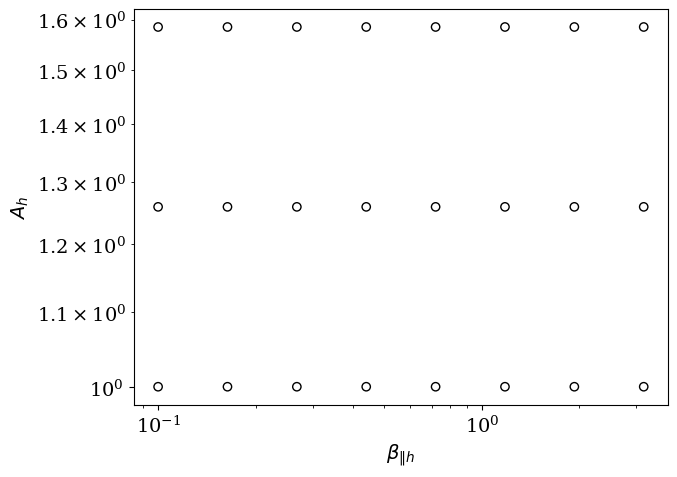

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(params[:, 2]/params[:, 0], params[:, 1], marker="o", facecolors='none', edgecolors='k')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")
plt.tight_layout()

In [7]:
# things that do not change between ensembles
t_max = 850
# isotropic cold electrons
A_c_init = 0. 
# vector with all normalized wavenumber
q_vec_original = np.linspace(0.05, 1., 100) 

In [8]:
for ii in range(14, params.shape[0]):
    print("ensemble #" + str(ii))
    print("A = ", params[ii, 1])
    print("beta = ", params[ii, 2])
    # hot electrons ration 
    delta = params[ii, 0] # ratio of hot electron population
    beta_par_h_init = params[ii, 2]/delta # initial beta parallel 
    A_h_init = params[ii, 1] # initial anisotropic level
    
    if delta != 1:
        # cold electrons
        beta_par_c_init = beta_par_h_init/100/(1-delta)# initial beta parallel 
        # ions 
        beta_par_i_init = beta_par_c_init*(1-delta)
        # 
        include_cold = True
    else:
        beta_par_c_init = 0
        beta_par_i_init = beta_par_h_init/100
        include_cold = False

    # perpendicular beta for plotting 
    beta_perp_c_init =  (A_c_init + 1) * beta_par_c_init  # initial beta perpendicular 
    beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 

    z_vec = get_z_vec(q_vec=q_vec_original, A_h=A_h_init, A_c=A_c_init, beta_par_c=beta_par_c_init, 
                      beta_par_h=beta_par_h_init, beta_par_i=beta_par_i_init, delta=delta, include_cold=include_cold)
    
    q_vec = q_vec_original[np.where(z_vec.imag>1e-3)]
    print("q resolution = " + str(len(q_vec)))
    print("q min = " + str(np.min(q_vec)))
    print("q zeroth = " + str(q_vec[0]))
    print("q max = " + str(np.max(q_vec)))
    print("q last = " + str(q_vec[-1]))
    
    dB_init = 1e-5 * np.ones(len(q_vec))

    # simulate 
    result = scipy.integrate.solve_ivp(fun=dydt, 
                                   t_span=[0, t_max], 
                                   y0=np.concatenate(([beta_perp_c_init], [beta_par_c_init], [beta_perp_h_init], [beta_par_h_init], dB_init)), 
                                   args=(q_vec, delta, beta_par_i_init, include_cold),
                                   atol=1e-8, rtol=1e-8, method='BDF')

    # save simulation
    np.save("data/ensemble_QLT/delta_" + str(delta) + "/t_" + str(ii) + ".npy", result.t)
    np.save("data/ensemble_QLT/delta_" + str(delta) + "/y_" + str(ii) + ".npy", result.y)

ensemble #14
A =  1.2589254117941673
beta =  1.9306977288832496
q resolution = 82
q min = 0.22272727272727272
q zeroth = 0.22272727272727272
q max = 1.0
q last = 1.0
ensemble #15
A =  1.2589254117941673
beta =  3.1622776601683795
q resolution = 87
q min = 0.17474747474747476
q zeroth = 0.17474747474747476
q max = 1.0
q last = 1.0


/Users/oissan/PycharmProjects/QLT_whistler/QLT_equations/rQLT.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(xi)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)


ensemble #16
A =  1.5848931924611136
beta =  0.1
q resolution = 30
q min = 0.7217171717171718
q zeroth = 0.7217171717171718
q max = 1.0
q last = 1.0
ensemble #17
A =  1.5848931924611136
beta =  0.16378937069540642
q resolution = 42
q min = 0.6065656565656565
q zeroth = 0.6065656565656565
q max = 1.0
q last = 1.0
ensemble #18
A =  1.5848931924611136
beta =  0.2682695795279726
q resolution = 53
q min = 0.501010101010101
q zeroth = 0.501010101010101
q max = 1.0
q last = 1.0
ensemble #19
A =  1.5848931924611136
beta =  0.43939705607607904
q resolution = 62
q min = 0.4146464646464646
q zeroth = 0.4146464646464646
q max = 1.0
q last = 1.0
ensemble #20
A =  1.5848931924611136
beta =  0.7196856730011519
q resolution = 70
q min = 0.33787878787878783
q zeroth = 0.33787878787878783
q max = 1.0
q last = 1.0
ensemble #21
A =  1.5848931924611136
beta =  1.1787686347935873
q resolution = 77
q min = 0.2707070707070707
q zeroth = 0.2707070707070707
q max = 1.0
q last = 1.0
ensemble #22
A =  1.584893192